### Q3. (ESL Exercise 15.6) Fit a series of random-forest classifiers to the SPAM data, to explore the sensitivity to m (the number of randomly selected inputs for each tree). Plot both the OOB error as well as the test error against a suitably chosen range of values for m.

In [1]:
install.packages("randomForest")
install.packages('ggplot2')


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpCMcOpI/downloaded_packages

The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpCMcOpI/downloaded_packages


In [2]:
library(dplyr)
library(randomForest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
install.packages("patchwork")


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpCMcOpI/downloaded_packages


In [4]:
library(caret)
library(ggplot2)
library(patchwork)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [5]:
#loading the data
spam_data <-  read.table("/Users/Bablu/Desktop/SDM/SDM FINAL HW/data.spam.txt")

In [6]:
set.seed(37)

In [7]:
#observing the data
head(spam_data)
dim(spam_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


[1] 4601   58

In [8]:
summary(spam_data)

       V1               V2               V3               V4          
 Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.00000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.: 0.00000  
 Median :0.0000   Median : 0.000   Median :0.0000   Median : 0.00000  
 Mean   :0.1046   Mean   : 0.213   Mean   :0.2807   Mean   : 0.06542  
 3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.:0.4200   3rd Qu.: 0.00000  
 Max.   :4.5400   Max.   :14.280   Max.   :5.1000   Max.   :42.81000  
       V5                V6               V7               V8         
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median :0.0000   Median :0.0000   Median : 0.0000  
 Mean   : 0.3122   Mean   :0.0959   Mean   :0.1142   Mean   : 0.1053  
 3rd Qu.: 0.3800   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000  
 Max.   :10.0000   Max.   :5.8800   Max.   :7.2700   Max.   :11.1100  
      

In [9]:
# converting to factor (if not randomForest does regression instead of classification)

spam_data$V58 <- factor(spam_data$V58)

In [10]:
rows <- nrow(spam_data)

In [11]:
# Number of rows for the training set is 80% of the dataset
row_train <- round(0.80 * rows)
train_in <- sample(1:rows, row_train)

In [20]:
#splitting train and test
training <- spam_data[train_in  ,]
head(training)
testing  <- spam_data[-train_in ,]
head(testing)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
3254,0.00,0,0.00,0,0.0,0.00,0.00,0.0,0.00,0.00,⋯,0,0.000,1.176,0.000,0.000,0.000,2.142,8,15,0
1560,0.32,0,0.80,0,0.8,0.32,0.16,0.0,0.64,0.00,⋯,0,0.050,0.000,0.050,0.075,0.000,1.419,15,159,1
621,0.00,0,0.00,0,0.0,0.00,0.00,0.0,0.00,0.00,⋯,0,0.000,0.000,0.125,0.000,1.126,7.054,37,261,1
1460,0.70,0,1.05,0,0.0,0.00,0.00,1.4,0.35,0.35,⋯,0,0.116,0.000,0.348,0.000,0.000,1.166,13,189,1
3199,0.00,0,0.00,0,0.0,0.00,0.00,0.0,0.00,0.00,⋯,0,0.000,0.000,0.000,0.000,0.000,1.000,1,6,0
146,0.00,0,0.00,0,0.0,0.00,0.00,0.0,0.00,0.00,⋯,0,0.215,0.000,0.215,0.431,0.000,4.277,27,77,1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
8,0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,⋯,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
17,0.00,0.00,0.00,0,0.94,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.000,0.000,0.428,0.000,0.000,4.652,31,107,1
19,0.00,0.00,0.55,0,1.11,0.00,0.18,0.00,0.00,0.00,⋯,0.000,0.182,0.000,0.455,0.000,0.000,1.320,4,70,1
21,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.729,0.000,0.729,0.000,0.000,3.833,9,23,1
22,0.05,0.07,0.10,0,0.76,0.05,0.15,0.02,0.55,0.00,⋯,0.042,0.101,0.016,0.250,0.046,0.059,2.569,66,2259,1


In [28]:
training_fra <- nrow(subset(training,V58 == 1))/nrow(training)
training_fra

testing_fra <- nrow(subset(testing,V58 == 1))/nrow(testing)
testing_fra

[1] 0.3942308

[1] 0.3938031

In [29]:
#training random forest

m.var <- c(1:37)

error <- function(var){
  n = length(var)
  obb_error = rep(0,n)
  test_error = rep(0,n)
    
    for(i in var){
    forest <- randomForest(as.factor(V58) ~ .,data = training, mtry = i, ntree = 100)
    predic <- predict(forest, newdata = testing)
    obb_error[i] <- mean((forest$predicted != training$V58)^2)
    test_error[i] <- mean((predic != testing$V58)^2)
  }
  return(data.frame(obb = obb_error,test_err = test_error))
}

In [30]:
r_errors <- error(m.var)

[1] 3

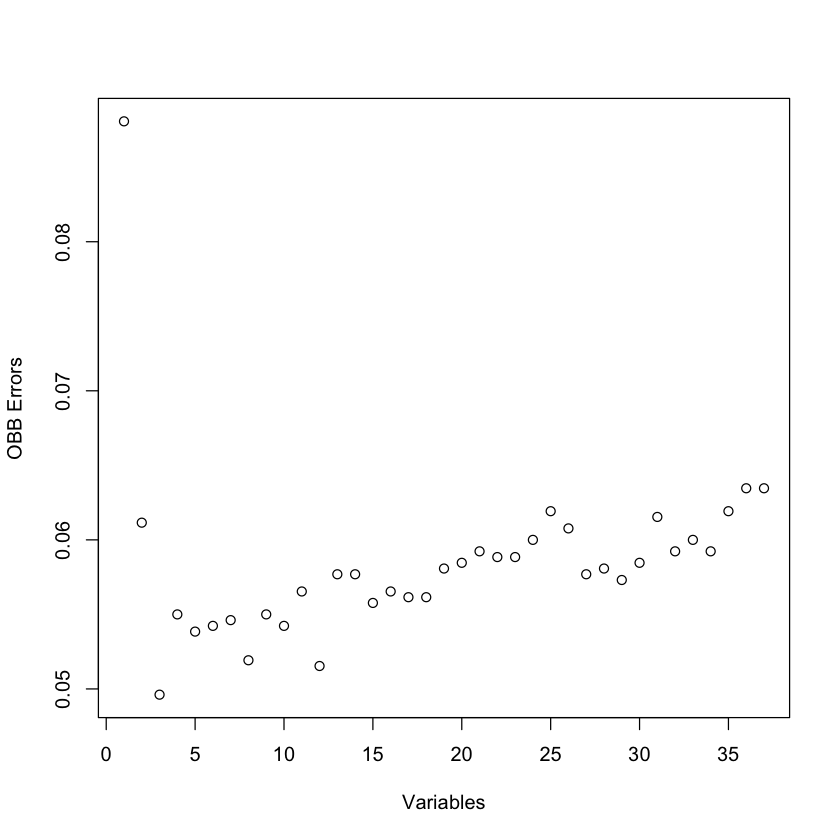

In [31]:
#plotting obb error
plot(m.var, r_errors$obb, xlab = "Variables", ylab = "OBB Errors")

obb_opt <- m.var[which.min(r_errors$obb)]
obb_opt

[1] 4

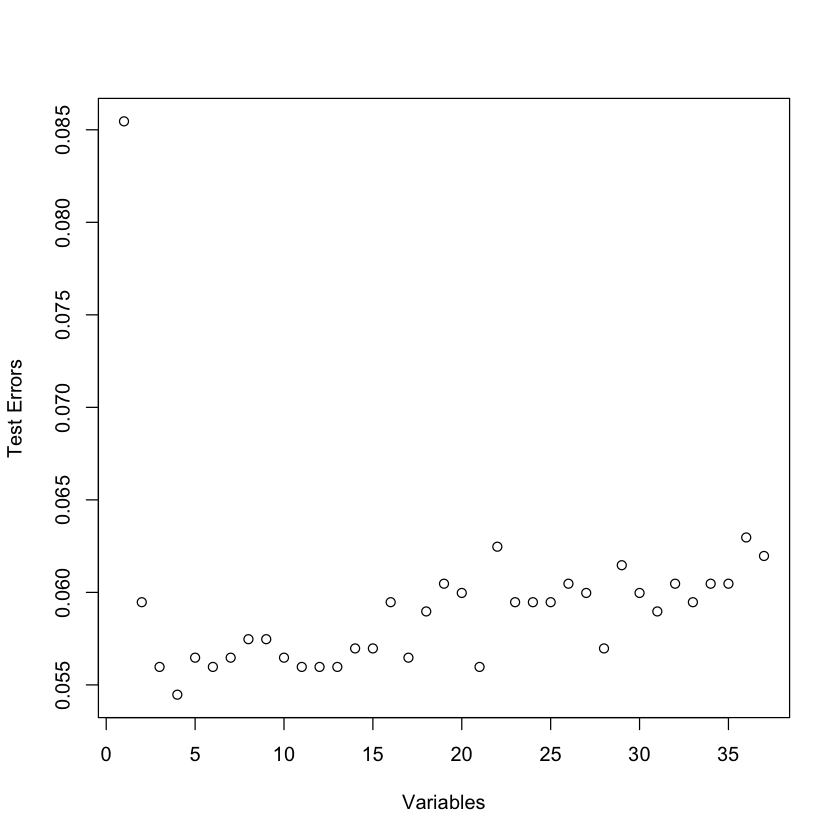

In [32]:
#plotting test error
plot(m.var, r_errors$test_err, xlab = "Variables", ylab = "Test Errors")

test_opt <- m.var[which.min(r_errors$test_err)]
test_opt

In [33]:
forest_err <- min(r_errors$test_err)
forest_err

[1] 0.05447276

### Q4.  This problem involves the OJ data set which is part of the ISLR2 package. 

In [39]:
library(ISLR)

#LOADING OJ DATA
data('OJ')

In [41]:
#saving the data in oj_data
oj_data <- OJ

In [72]:
set.seed(37)

In [73]:
#observing the data
head(oj_data)
dim(oj_data)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


[1] 1070   18

In [74]:
summary(oj_data)

 Purchase WeekofPurchase     StoreID        PriceCH         PriceMM     
 CH:653   Min.   :227.0   Min.   :1.00   Min.   :1.690   Min.   :1.690  
 MM:417   1st Qu.:240.0   1st Qu.:2.00   1st Qu.:1.790   1st Qu.:1.990  
          Median :257.0   Median :3.00   Median :1.860   Median :2.090  
          Mean   :254.4   Mean   :3.96   Mean   :1.867   Mean   :2.085  
          3rd Qu.:268.0   3rd Qu.:7.00   3rd Qu.:1.990   3rd Qu.:2.180  
          Max.   :278.0   Max.   :7.00   Max.   :2.090   Max.   :2.290  
     DiscCH            DiscMM         SpecialCH        SpecialMM     
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.05186   Mean   :0.1234   Mean   :0.1477   Mean   :0.1617  
 3rd Qu.:0.00000   3rd Qu.:0.2300   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :0.50000   Max.   :0.8000   Max.   :1.0000   Max.   :1.0000  

#### 4(a) - Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations. 

In [75]:
#creating train and test
train_in<-sample(dim(OJ)[1], 800, replace = FALSE)

training<-oj_data[train_in,]
testing<-oj_data[-train_in,]

In [76]:
head(training)
dim(training)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
621,CH,269,7,1.86,2.13,0.27,0.0,1,0,0.893270,2.13,1.59,0.54,Yes,0.000000,0.145161,0.27,0
548,MM,235,2,1.69,1.99,0.00,0.0,0,0,0.109052,1.99,1.69,0.30,No,0.000000,0.000000,0.30,2
1065,CH,251,7,1.86,2.09,0.10,0.0,0,0,0.484778,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
453,CH,267,2,1.86,2.18,0.00,0.4,0,1,0.484979,1.78,1.86,-0.08,No,0.183486,0.000000,0.32,2
146,MM,233,7,1.75,1.99,0.00,0.4,1,0,0.500000,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


[1] 800  18

In [77]:
head(testing)
dim(testing)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
7,CH,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
22,CH,258,1,1.76,2.18,0.00,0.0,0,0,0.680000,2.18,1.76,0.42,No,0.000000,0.000000,0.42,1
23,CH,259,7,1.86,2.18,0.00,0.0,0,0,0.744000,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
24,CH,264,7,1.86,2.13,0.37,0.0,1,0,0.795200,2.13,1.49,0.64,Yes,0.000000,0.198925,0.27,0


[1] 270  18

#### 4(b) -  Fit a support vector classifier to the training data using cost = 0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained. 

In [78]:
library(e1071)

In [82]:
oj_svm_lin<- svm(Purchase ~ ., kernel='linear',  data=training, cost=0.01)
summary(oj_svm_lin)


Call:
svm(formula = Purchase ~ ., data = training, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  426

 ( 214 212 )


Number of Classes:  2 

Levels: 
 CH MM




Out of 800 training points, the support vector classifier generates 426 support vectors. 213 of these are at the CH level, while the remaining 213 are at the MM level.

#### 4(c) -  What are the training and test error rates? 

In [86]:
#training error
training_predic<-predict(oj_svm_lin, training)
mean(training_predic != training$Purchase)

[1] 0.15375

Training error rate is 15.37%

In [87]:
#testing error
testing_predic<-predict(oj_svm_lin, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2111111

Testing error rate is 21.1%

#### 4(d) - Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10. 

In [89]:
oj_data_tune<-tune(svm, Purchase ~ ., data=training, kernel='linear', ranges=list(cost = seq(0.01, 10, length = 10)))
summary(oj_data_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 5.56

- best performance: 0.1475 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.16000 0.04958158
2   1.12 0.15125 0.04581439
3   2.23 0.14750 0.04779877
4   3.34 0.14750 0.04706674
5   4.45 0.14875 0.04543387
6   5.56 0.14750 0.04556741
7   6.67 0.15125 0.04387878
8   7.78 0.15000 0.04249183
9   8.89 0.14875 0.04466309
10 10.00 0.14875 0.04466309


#### 4(e) -  Compute the training and test error rates using this new value for cost.

In [90]:
#training error

new_oj_svm_lin<-svm(Purchase ~ ., kernel='linear', data=training, cost=oj_data_tune$best.parameters$cost)
training_predic<-predict(new_oj_svm_lin, training)

mean(training_predic != training$Purchase)

[1] 0.13875

The training error has decreased to 13.87% from 15.37% with the use of optimal cost

In [91]:
#testing error

testing_predic<-predict(new_oj_svm_lin, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2296296

The testing error has increased with the use of optimal cost - 22.96%

#### 4(f) -  Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [92]:
#radial kernal
oj_svm_radial<-svm(Purchase~ ., kernel='radial', data=training )
summary(oj_svm_radial)


Call:
svm(formula = Purchase ~ ., data = training, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  348

 ( 177 171 )


Number of Classes:  2 

Levels: 
 CH MM




The radial kernal createst 348 support vectors out of 800 and CH and MM are split into 174 each

In [93]:
#training error- radial
training_predic<-predict(oj_svm_radial, training)
mean(training_predic != training$Purchase)

[1] 0.13125

Training error for radial kernal is 13.12%

In [94]:
#testing error - radial
testing_predic<-predict(oj_svm_radial, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2185185

Testing error for radial kernal is 21.85%

In [95]:
#tune() - radial

oj_radial_tune<-tune(svm, Purchase ~ ., data=training, kernel='radial', ranges=list(cost = seq(0.01, 10, length = 10)))
summary(oj_radial_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 1.12

- best performance: 0.155 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.40875 0.03682259
2   1.12 0.15500 0.04174992
3   2.23 0.16750 0.03395258
4   3.34 0.16625 0.03537988
5   4.45 0.16750 0.03395258
6   5.56 0.16625 0.03120831
7   6.67 0.16875 0.03019037
8   7.78 0.16875 0.03019037
9   8.89 0.17000 0.03291403
10 10.00 0.17125 0.03283481


In [96]:
#new value - radial
#training error
new_oj_svm_radial<-svm(Purchase ~ ., kernel='radial', data=training, cost=oj_radial_tune$best.parameters$cost)
training_predic<-predict(new_oj_svm_radial, training)
mean(training_predic != training$Purchase)

[1] 0.135

Training error rate - 13.5% a slight increase than before

In [97]:
#testing error
testing_predic<-predict(new_oj_svm_radial, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2148148

Testing error rate - 21.48%

#### 4(g) -  Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2. 

In [98]:
#polynimial kernal
oj_svm_poly<-svm(Purchase~ ., kernel='polynomial', data=training, degree=2 )
summary(oj_svm_poly)


Call:
svm(formula = Purchase ~ ., data = training, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  444

 ( 227 217 )


Number of Classes:  2 

Levels: 
 CH MM




The polynomial kernal with degree 2 creates 444 support vectors of which 222 belong to CH and rest to MM

In [99]:
#training error- poly
training_predic<-predict(oj_svm_poly, training)
mean(training_predic != training$Purchase)

[1] 0.16

Training error rate is 16%

In [100]:
#testing error - poly
testing_predic<-predict(oj_svm_poly, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2111111

Testing error rate is 21.1%

In [102]:
#tune() - poly
oj_poly_tune<-tune(svm, Purchase ~ ., data=training, kernel='polynomial', degree=2, ranges=list(cost = seq(0.01, 10, length = 10)))
summary(oj_poly_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 3.34

- best performance: 0.16125 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.38375 0.06429371
2   1.12 0.18625 0.03747684
3   2.23 0.16750 0.02713137
4   3.34 0.16125 0.02913689
5   4.45 0.16125 0.02853482
6   5.56 0.16250 0.02500000
7   6.67 0.16375 0.02161050
8   7.78 0.16500 0.02622022
9   8.89 0.16250 0.02700309
10 10.00 0.16500 0.02486072


In [103]:
#new value - poly
new_oj_svm_poly<-svm(Purchase ~ ., kernel='polynomial', data=training, degree=2, cost=oj_poly_tune$best.parameters$cost)
training_predic<-predict(new_oj_svm_poly, training)
mean(training_predic != training$Purchase)

[1] 0.1325

Training error rate - 13.25%, it's a significant reduction from original

In [105]:
testing_predic<-predict(new_oj_svm_poly, testing)
mean(testing_predic != testing$Purchase)

[1] 0.2148148

Testing error rate is 21.48%

#### 4(h) -  Overall, which approach seems to give the best results on this data? 

Basis radial kernel with the default gamma is the method that, overall, produces the best results with these data. The training and test datasets with this method had the lowest misclassification rate.

### Q7 - Fit a neural network to the Default data in the ISLR2 package. Use a single hidden layer with 10 units, and regularization. Have a look at ISLR Labs 10.9.1–10.9.2, and in class, for guidance. Compare the classification performance of yourmodel with that of logistic regression. 

In [2]:
install.packages("keras")
install.packages("tensorflow")


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpbcUsZU/downloaded_packages

The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpbcUsZU/downloaded_packages


In [3]:
library(ISLR2)
library(keras)
library(glmnet)
library(tensorflow)

Loading required package: Matrix

Loaded glmnet 4.1-4



In [4]:
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

In [5]:
#null values
sum(is.na(Default))

[1] 0

In [6]:
#logistic regression
x <- scale(model.matrix(default ~ . - 1, data = Default))
y <- Default$default

In [7]:
set.seed(37)

In [8]:
#creating train and test data
train_in <- sample(1:nrow(x), nrow(x)*.8)
training <- y[train_in]
testing <- y[-train_in]

In [9]:
library(glmnet)

In [10]:
cv_fitting <- cv.glmnet(x[train_in, ], as.numeric(training), family = "binomial", type.measure = "class")
c_predic <- predict(cv_fitting, x[-train_in, ], s = "lambda.min", type = "response")
log_reg_predic <- rep("No", length(c_predic))
log_reg_predic[c_predic >0.5] <- "Yes"
table(log_reg_predic, testing)

              testing
log_reg_predic   No  Yes
           No  1916   50
           Yes    8   26

In [11]:
1-(1916+50)/(26+8+1916+50)

[1] 0.017

error rate from logestic regression - 1.7%

In [ ]:
#neural model

In [ ]:
nn <-  keras_model_sequential() %>%
  layer_dense(10, activation = 'relu',
              input_shape = ncol(x[train_in, ])) %>%
  layer_dropout(rate = 0.7) %>%
  layer_dense(units = 1, activation = 'sigmoid')

In [ ]:
nn %>% compile(loss = "categorical_crossentropy",
                  optimizer = optimizer_rmsprop(),
                  metrics = "accuracy")

In [ ]:
history <- nn %>% fit(x[train_in, ], as.numeric(as.factor(training)), epochs = 100, batch_size = 254,
                            validation_data = list(x[-train_in, ], as.numeric(as.factor(testing))))

In [13]:
acc <- function(predic, truth){
  mean(drop(predic) == drop(truth))
}

In [ ]:
1 - nn %>% predict_classes(x[-train_in, ]) %>% acc(as.numeric(as.factor(testing)))

error rate here - 2.3%

Given that the error rate on the test data is lower, the neural network performs better in this situation than logistic regression.